# u2001820 Powerlifting Project: Equipment & The Strongest Competitors
---
We aim to investigate the powerlifting dataset available on <a href="https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database">Kaggle</a>.

This notebook is dedicated to exploring the impact of equipment on the weight lifted, as well as some brief analysis of the strongest lifters in the dataset.

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv("cleaned_powerlifting.csv")

C:\Users\asale\AppData\Local\Temp\ipykernel_9148\2428485417.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_powerlifting.csv")


### Impact of equipment on lifts

In [119]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,...,354.74,312.20,596.18,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [120]:
df.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 562589
AgeClass            544676
Division              5890
BodyweightKg             0
WeightClassKg            0
Squat1Kg            725671
Squat2Kg            729771
Squat3Kg            738995
Squat4Kg           1055440
Best3SquatKg         41909
Bench1Kg            730531
Bench2Kg            734369
Bench3Kg            743806
Bench4Kg           1055908
Best3BenchKg         60555
Deadlift1Kg         733202
Deadlift2Kg         739732
Deadlift3Kg         753660
Deadlift4Kg        1053822
Best3DeadliftKg      67596
TotalKg              81228
Place                    0
Wilks                81228
McCulloch            81318
Glossbrenner         81228
IPFPoints            82572
Tested              197530
Country             834245
Federation               0
Date                     0
MeetCountry              0
MeetState           275340
MeetName                 0
d

In [121]:
df_eq = df[['Name', 'Sex', 'Equipment', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 
            'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Tested', 'Date']]

In [122]:
df_eq.isnull().sum()

Name                    0
Sex                     0
Equipment               0
Age                562589
AgeClass           544676
BodyweightKg            0
WeightClassKg           0
Best3SquatKg        41909
Best3BenchKg        60555
Best3DeadliftKg     67596
TotalKg             81228
Place                   0
Tested             197530
Date                    0
dtype: int64

In [123]:
df_eq['Tested'].fillna('No', inplace = True)

C:\Users\asale\AppData\Local\Temp\ipykernel_9148\2624274008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq['Tested'].fillna('No', inplace = True)


In [127]:
df_eq.dropna(inplace=True)

C:\Users\asale\AppData\Local\Temp\ipykernel_9148\1819932245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq.dropna(inplace=True)


In [128]:
df_eq.isnull().sum()

Name               0
Sex                0
Equipment          0
Age                0
AgeClass           0
BodyweightKg       0
WeightClassKg      0
Best3SquatKg       0
Best3BenchKg       0
Best3DeadliftKg    0
TotalKg            0
Place              0
Tested             0
Date               0
dtype: int64

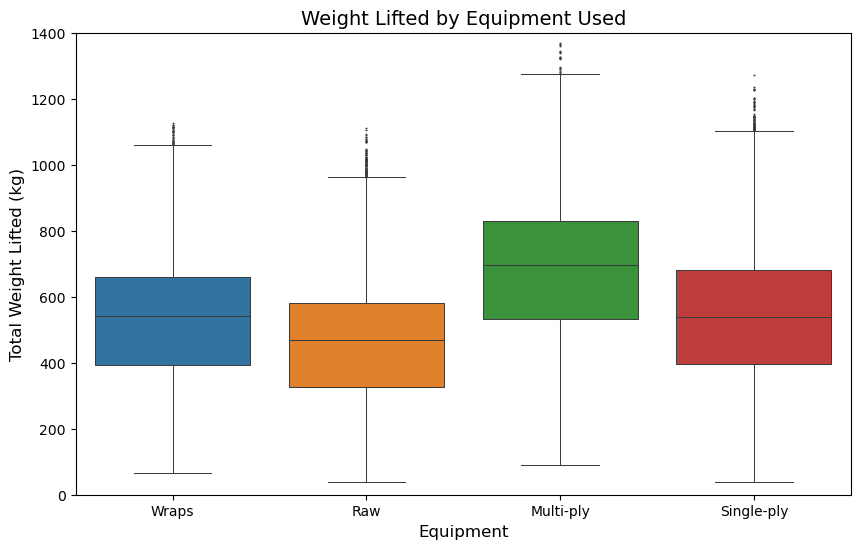

In [158]:
plt.figure(figsize = (10, 6))
sns.boxplot(x=df_eq['Equipment'], y = df_eq['TotalKg'], linewidth=.75, fliersize=.5)
plt.xlabel("Equipment", fontsize=12)
plt.ylabel("Total Weight Lifted (kg)", fontsize=12)
plt.ylim(0,1400)
plt.title("Weight Lifted by Equipment Used", fontsize=14)
plt.show()

In [169]:
equipment = df_eq['Equipment'].unique().tolist()

In [174]:
for item in equipment:
    series = df_eq['TotalKg'][df_eq['Equipment'] == item]
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1    
    print(f"The mean for the {item} category is {series.quantile(0.5)}kg, with IQR {IQR}kg.")

The mean for the Wraps category is 542.5kg, with IQR 267.48kg.
The mean for the Raw category is 467.5kg, with IQR 255.0kg.
The mean for the Multi-ply category is 695.0kg, with IQR 297.5kg.
The mean for the Single-ply category is 539.845kg, with IQR 282.5kg.


We now investigate the relationship between the equipment used and the three individual lifts. Note that negative values correspond to failed lifts.

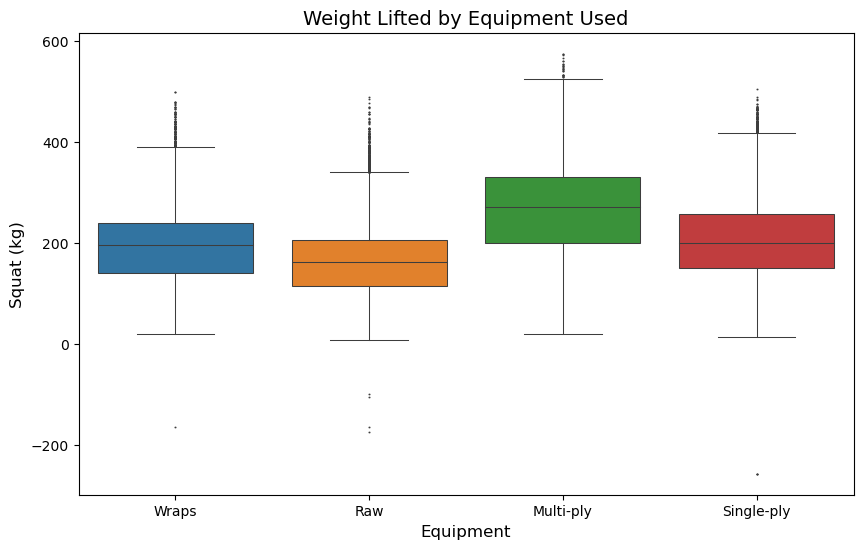

In [209]:
plt.figure(figsize = (10, 6))
sns.boxplot(x=df_eq['Equipment'], y = df_eq['Best3SquatKg'], linewidth=.75, fliersize=.5)
plt.xlabel("Equipment", fontsize=12)
plt.ylabel("Squat (kg)", fontsize=12)
# plt.ylim(0,1400)
plt.title("Weight Lifted by Equipment Used", fontsize=14)
plt.show()

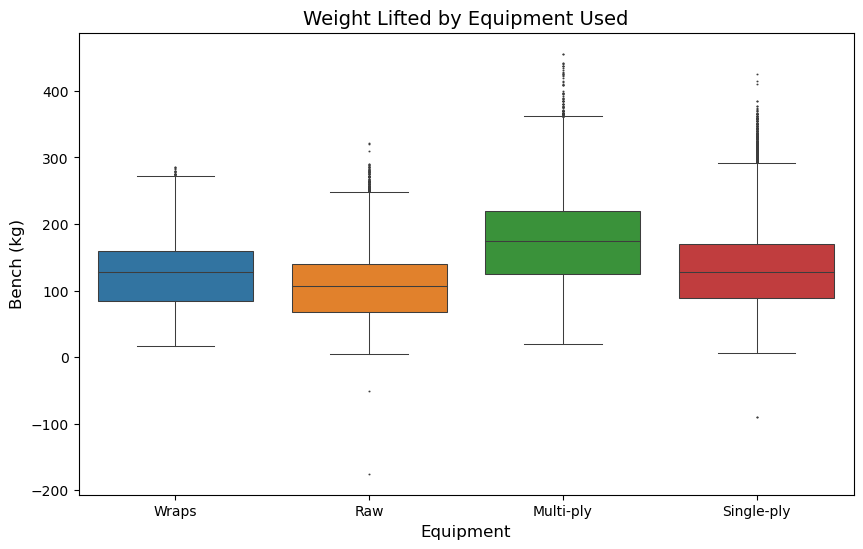

In [210]:
plt.figure(figsize = (10, 6))
sns.boxplot(x=df_eq['Equipment'], y = df_eq['Best3BenchKg'], linewidth=.75, fliersize=.5)
plt.xlabel("Equipment", fontsize=12)
plt.ylabel("Bench (kg)", fontsize=12)
# plt.ylim(0,1400)
plt.title("Weight Lifted by Equipment Used", fontsize=14)
plt.show()

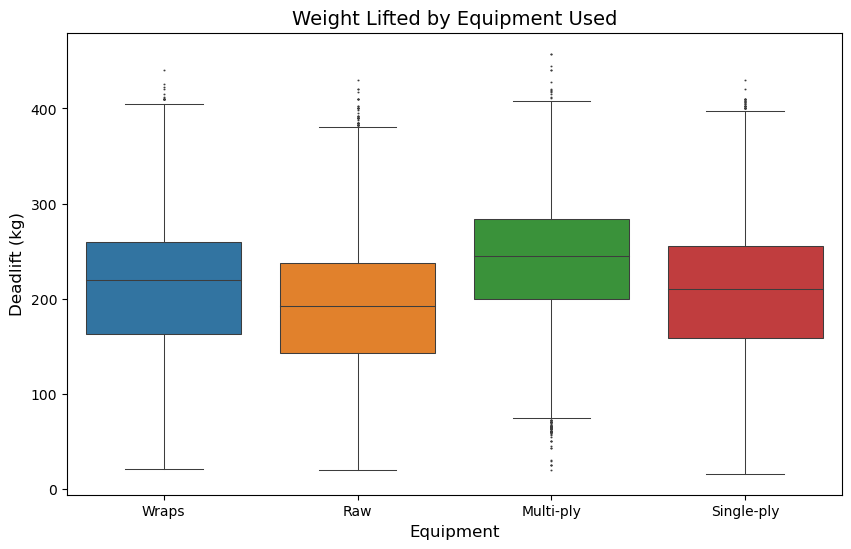

In [211]:
plt.figure(figsize = (10, 6))
sns.boxplot(x=df_eq['Equipment'], y = df_eq['Best3DeadliftKg'], linewidth=.75, fliersize=.5)
plt.xlabel("Equipment", fontsize=12)
plt.ylabel("Deadlift (kg)", fontsize=12)
# plt.ylim(0,1400)
plt.title("Weight Lifted by Equipment Used", fontsize=14)
plt.show()

We now investigate how equipment use has evolved over time:

In [213]:
df_eq['Date'] = pd.to_datetime(df_eq['Date'])

C:\Users\asale\AppData\Local\Temp\ipykernel_9148\1710692497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq['Date'] = pd.to_datetime(df_eq['Date'])


In [215]:
type(df_eq['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [217]:
df_eq['Year'] = df_eq['Date'].dt.year

C:\Users\asale\AppData\Local\Temp\ipykernel_9148\2924811379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq['Year'] = df_eq['Date'].dt.year


In [218]:
df_eq.head()

,Name,Sex,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Tested,Date,Year
0,Abbie Murphy,F,Wraps,29.0,24-34,59.8,60,105.0,55.0,130.0,290.0,4,No,2018-10-27,2018
1,Abbie Tuong,F,Wraps,29.0,24-34,58.5,60,120.0,67.5,145.0,332.5,2,No,2018-10-27,2018
2,Amy Moldenhauer,F,Wraps,23.0,20-23,60.0,60,105.0,72.5,132.5,310.0,3,No,2018-10-27,2018
3,Andrea Rowan,F,Wraps,45.0,45-49,104.0,110,140.0,80.0,170.0,390.0,3,No,2018-10-27,2018
4,April Alvarez,F,Wraps,37.0,35-39,74.0,75,142.5,82.5,145.0,370.0,5,No,2018-10-27,2018


In [254]:
df_year = df_eq.groupby(['Year'])[['Best3SquatKg','Best3BenchKg',
                       'Best3DeadliftKg','TotalKg','BodyweightKg']].max().reset_index()

In [255]:
df_year.head()

,Year,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg
0,1964,272.16,213.19,322.05,807.40,143.79
1,1965,306.18,216.36,335.66,858.20,151.61
2,1966,294.84,204.12,326.59,825.54,129.73
3,1967,319.78,204.12,323.41,824.63,110.00
4,1968,322.05,217.72,328.40,861.37,110.00


In [256]:
df_year['Year'].unique()

array([1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

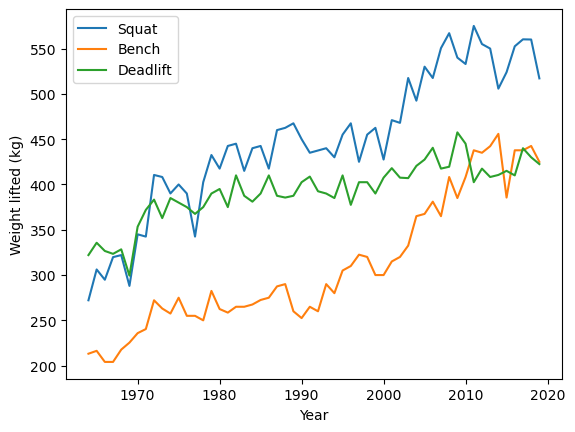

In [257]:
sns.lineplot(x = df_year['Year'], y = df_year['Best3SquatKg'], label='Squat')
sns.lineplot(x = df_year['Year'], y = df_year['Best3BenchKg'], label='Bench')
sns.lineplot(x = df_year['Year'], y = df_year['Best3DeadliftKg'], label='Deadlift')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Weight lifted (kg)')
plt.show()

<Axes: xlabel='Year', ylabel='TotalKg'>

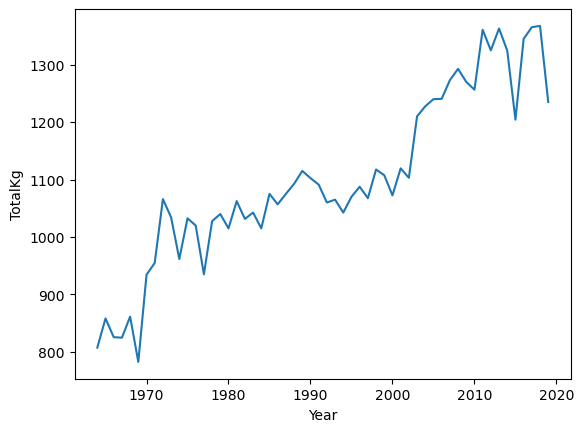

In [248]:
sns.lineplot(x = df_year['Year'], y = df_year['TotalKg'])

The above time series were produced using the max lift values of each year. If you use the mean values instead, each time series ends up decreasing on average. This is because powerlifting is far more popular now than in the previous century, meaning more data to average over in recent decades, hence modern averages decreasing far more as opposed to the 1970s, 80s, etc.

Next, we observe the results of a correlation matrix

In [199]:
df_onehot = pd.get_dummies(df_eq, columns=['Equipment'])

In [200]:
df_onehot = df_onehot.rename(columns={'Equipment_Multi-ply': 'Multi-ply', 
                                                      'Equipment_Raw': 'Raw', 
                                                      'Equipment_Single-ply': 'Single-ply', 
                                                      'Equipment_Wraps': 'Wraps'})

In [201]:
df_onehot.head()

,Name,Sex,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Tested,Date,Multi-ply,Raw,Single-ply,Wraps
0,Abbie Murphy,F,29.0,24-34,59.8,60,105.0,55.0,130.0,290.0,4,No,2018-10-27,False,False,False,True
1,Abbie Tuong,F,29.0,24-34,58.5,60,120.0,67.5,145.0,332.5,2,No,2018-10-27,False,False,False,True
2,Amy Moldenhauer,F,23.0,20-23,60.0,60,105.0,72.5,132.5,310.0,3,No,2018-10-27,False,False,False,True
3,Andrea Rowan,F,45.0,45-49,104.0,110,140.0,80.0,170.0,390.0,3,No,2018-10-27,False,False,False,True
4,April Alvarez,F,37.0,35-39,74.0,75,142.5,82.5,145.0,370.0,5,No,2018-10-27,False,False,False,True


In [202]:
df_onehot = df_onehot.drop(columns=['Name', 'Sex', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 'Place', 'Tested', 'Date'])

In [203]:
df_onehot.head()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Multi-ply,Raw,Single-ply,Wraps
0,105.0,55.0,130.0,290.0,False,False,False,True
1,120.0,67.5,145.0,332.5,False,False,False,True
2,105.0,72.5,132.5,310.0,False,False,False,True
3,140.0,80.0,170.0,390.0,False,False,False,True
4,142.5,82.5,145.0,370.0,False,False,False,True


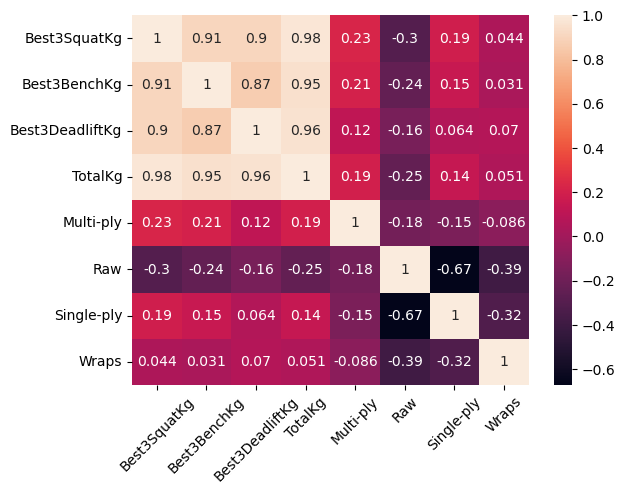

In [206]:
correlation = df_onehot.corr()

# # Create a mask for the upper triangle
# mask = np.triu(np.ones_like(correlation, dtype=bool))
# sns.heatmap(correlation, mask=mask, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.xticks(rotation=45)
plt.show()

### The strongest competitors

In the following, we only consider competitors lifting without any equipment:

In [30]:
df_new = df[df['Equipment'] == 'Raw']

df_new.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
10,Christina Tsatsoulis,F,SBD,Raw,27.0,24-34,F-OR,102.0,110,135.0,...,333.24,285.55,571.03,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
13,Elizabeth Ciortuz,F,SBD,Raw,19.0,18-19,F-OR,72.7,75,95.0,...,302.58,256.21,486.30,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
18,Jasmine Hoare,F,SBD,Raw,31.0,24-34,F-OR,77.7,82.5,130.0,...,353.56,310.54,599.76,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
20,Joelle Savgy,F,SBD,Raw,29.0,24-34,F-OR,72.1,75,90.0,...,294.98,259.82,492.05,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
30,Nicole Brown,F,SBD,Raw,28.0,24-34,F-OR,57.7,60,82.5,...,284.47,251.48,439.90,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [31]:
len(df_new)

280202

In [32]:
df_new['Name'].nunique()

121434

Many competitors have entered multiple powerlifting competitions. We only wish to consider the best performance of each competitor, so we aggregate weights lifted by taking the maximum across each person's competition performances rather than the average value.

In [33]:
df_agg = df_new.groupby(['Name','Sex',])[['Best3SquatKg','Best3BenchKg',
                       'Best3DeadliftKg','TotalKg','BodyweightKg']].max().reset_index()

In [34]:
df_agg.head()

,Name,Sex,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg
0,A Ajeesha,F,112.5,55.0,132.5,300.0,71.1
1,A Jay Montanez,M,225.0,165.0,270.0,660.0,123.9
2,A Kashirin,M,NaN,145.0,NaN,NaN,73.5
3,A Sazanov,M,120.0,77.5,135.0,332.5,58.4
4,A Yang,M,210.0,110.0,235.0,555.0,67.1


In [35]:
df_agg = df_agg.dropna()

In [36]:
df_agg.head()

,Name,Sex,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg
0,A Ajeesha,F,112.5,55.0,132.5,300.0,71.1
1,A Jay Montanez,M,225.0,165.0,270.0,660.0,123.9
3,A Sazanov,M,120.0,77.5,135.0,332.5,58.4
4,A Yang,M,210.0,110.0,235.0,555.0,67.1
5,A'Dren Hye,M,287.5,195.0,280.0,757.5,104.1


We look into the 200 strongest competitors, i.e. the 200 competitors who were able to lift the most weight in total:

In [37]:
len(df_agg)

117807

In [38]:
result = df_agg.nlargest(200, 'TotalKg')

In [39]:
result.head()

,Name,Sex,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg
94269,Ray Williams #1,M,490.0,247.5,398.5,1112.5,190.40
59624,Josh Morris #1,M,417.5,290.3,410.0,1077.5,187.97
36972,Eric Lilliebridge,M,417.5,250.0,410.0,1075.0,138.80
66693,Kirill Sarychev,M,350.0,320.0,402.5,1072.5,177.40
47056,JP Price,M,435.0,290.0,345.0,1070.0,170.37


In [42]:
top200 = result['Name'].values
print(top200)

['Ray Williams #1' 'Josh Morris #1' 'Eric Lilliebridge' 'Kirill Sarychev'
 'JP Price' 'Jezza Uepa' 'Larry Williams #1' 'Bryan Hartsel'
 'Don Reinhoudt' 'Daniel Bell #1' 'Derek Kendall' 'Kelly Branton'
 'Shawn Doyle' 'Brandon Allen #1' 'Dennis Cornelius' 'Jake Johns'
 'Luke Richardson #1' 'Pavlo Nakonechnyy' 'Chad Wesley Smith'
 'Stan Efferding' 'Mikhail Koklyaev' 'Scott Weech' 'Blaine Sumner'
 'Rob Hall' 'Erick Lewis' 'Matt Wenning' 'Andy Huang #1' 'Robb Philippus'
 'Konstantīn Konstantīnovs' 'Brian Siders' 'Dane Dillon' 'Zac Meyers'
 'Dan Kovacs' 'Beau Moore #1' 'Zach Smith' 'Domenick Minnici'
 'Cooper Wage' 'Kevin Oak' 'James Searcy' 'Mohamed Bouafia' 'Zack Meyers'
 'Joseph Whittaker' 'Ivan Podrez' 'Jeff Younker' 'Martins Kruze'
 'Paul Wrenn' 'Jason Byrne #1' 'Aleksandr Pirogov' 'Aria Attia'
 'Jason Belcher' 'Andrew Herbert' 'Nikolai Fesaniuk' 'Shane Haller'
 'Siim Rast' 'Dan Green' 'George McLaren' 'James Heely' 'James Strickland'
 'Michael Carter' 'Pete Rubish' 'Tee Popoola' 'Perry

Now we return to the original cleaned dataset filter it for these top 200 competitors:

In [43]:
df_top = df_new[df_new['Name'].isin(top200)]

In [44]:
df_top.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
5605,George McLaren,M,SBD,Raw,32.0,24-34,M-OR,160.0,140+,300.0,...,470.09,442.23,612.67,NaN,Australia,GPC-AUS,2016-07-08,Australia,QLD,Nationals
14542,Jason Belcher,M,SBD,Raw,36.5,35-39,Open,140.0,140,NaN,...,535.06,506.91,741.66,NaN,NaN,USPF,2018-06-02,USA,WV,Nationals
14739,Thomas Paynter,M,SBD,Raw,23.0,20-23,Juniors 20-23,140.0,140,NaN,...,378.59,358.67,500.06,NaN,NaN,USPF,2015-03-28,USA,WV,WV State Open
15459,Kade Weber,M,SBD,Raw,23.0,20-23,M-H,109.2,110,310.0,...,547.06,524.20,818.75,NaN,Canada,RUPC,2013-02-24,USA,FL,Raw Unity VI
15463,Scott Weech,M,SBD,Raw,27.0,24-34,M-H,148.2,140+,360.0,...,544.54,514.70,741.66,NaN,USA,RUPC,2013-02-24,USA,FL,Raw Unity VI


In [45]:
len(df_top)

1334

In [48]:
# sort dataframe in descending order of TotalKg
df_sorted = df_top.sort_values(by='TotalKg', ascending=False)

df_sorted.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
567018,Ray Williams #1,M,SBD,Raw,32.0,24-34,MR-O,190.40,120+,450.0,...,593.83,552.62,756.73,Yes,USA,USAPL,2019-03-02,USA,OH,Arnold SBD Pro American
1025436,Ray Williams #1,M,SBD,Raw,30.0,24-34,Open,182.26,120+,440.0,...,593.51,554.13,766.00,Yes,USA,NAPF,2017-03-04,USA,OH,Arnold Slingshot Pro American
515429,Ray Williams #1,M,SBD,Raw,31.0,24-34,MR-O,187.41,120+,442.5,...,584.37,544.56,746.90,Yes,USA,USAPL,2018-03-03,USA,OH,The Arnold SBD Pro American
793437,Ray Williams #1,M,SBD,Raw,30.0,24-34,Open,181.22,120+,450.0,...,585.98,547.29,756.43,Yes,USA,IPF,2017-06-14,Belarus,NaN,World Classic Powerlifting Championships
790158,Ray Williams #1,M,SBD,Raw,31.0,24-34,Open,189.20,120+,-442.5,...,578.82,538.96,736.89,Yes,USA,IPF,2018-06-06,Canada,NaN,6th World Classic Championships


In [97]:
# remove duplicate names
df_no_dupes = df_sorted.drop_duplicates(subset=['Name'])

In [98]:
len(df_no_dupes)

200

In [99]:
df_no_dupes.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
567018,Ray Williams #1,M,SBD,Raw,32.0,24-34,MR-O,190.40,120+,450.0,...,593.83,552.62,756.73,Yes,USA,USAPL,2019-03-02,USA,OH,Arnold SBD Pro American
1035828,Josh Morris #1,M,SBD,Raw,27.0,24-34,Pro Open,178.81,140+,NaN,...,580.50,542.58,751.37,NaN,NaN,RPS,2017-08-12,USA,KY,Braggin Rights
1010210,Eric Lilliebridge,M,SBD,Raw,26.0,24-34,MOR,138.80,140,-392.5,...,601.50,570.07,846.73,NaN,USA,UPA,2016-04-16,USA,IA,Powerlifting Nationals
628405,Kirill Sarychev,M,SBD,Raw,27.0,24-34,Open,177.40,140+,310.0,...,578.54,540.98,750.22,NaN,Russia,WRPF,2016-11-19,Russia,NaN,Pro World Championships
132537,Jezza Uepa,M,SBD,Raw,37.0,35-39,Open,181.40,120+,440.0,...,575.14,537.13,740.66,Yes,Nauru,PA,2017-10-21,Australia,QLD,Brisbane Open


Different powerlifting competitions may have different weight classes. As such, we make our own standard weight classses:

In [100]:
def weight_class(x):
    for i in range(10, 140, 10):
        if(x < i):
            return f"{str(i-10).zfill(3)} - {i} kg"
    return "130+ kg"
    
df_no_dupes.loc[:, ('WeightClassKg')] = df_no_dupes['BodyweightKg'].apply( lambda x: weight_class(x))

In [101]:
df_no_dupes.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
567018,Ray Williams #1,M,SBD,Raw,32.0,24-34,MR-O,190.40,130+ kg,450.0,...,593.83,552.62,756.73,Yes,USA,USAPL,2019-03-02,USA,OH,Arnold SBD Pro American
1035828,Josh Morris #1,M,SBD,Raw,27.0,24-34,Pro Open,178.81,130+ kg,NaN,...,580.50,542.58,751.37,NaN,NaN,RPS,2017-08-12,USA,KY,Braggin Rights
1010210,Eric Lilliebridge,M,SBD,Raw,26.0,24-34,MOR,138.80,130+ kg,-392.5,...,601.50,570.07,846.73,NaN,USA,UPA,2016-04-16,USA,IA,Powerlifting Nationals
628405,Kirill Sarychev,M,SBD,Raw,27.0,24-34,Open,177.40,130+ kg,310.0,...,578.54,540.98,750.22,NaN,Russia,WRPF,2016-11-19,Russia,NaN,Pro World Championships
132537,Jezza Uepa,M,SBD,Raw,37.0,35-39,Open,181.40,130+ kg,440.0,...,575.14,537.13,740.66,Yes,Nauru,PA,2017-10-21,Australia,QLD,Brisbane Open


In [102]:
df_no_dupes['WeightClassKg'].value_counts()

WeightClassKg
130+ kg         122
120 - 130 kg     31
110 - 120 kg     27
100 - 110 kg     13
090 - 100 kg      6
080 - 90 kg       1
Name: count, dtype: int64

In [103]:
df_no_dupes.isnull().sum()

Name                 0
Sex                  0
Event                0
Equipment            0
Age                 10
AgeClass             9
Division             1
BodyweightKg         0
WeightClassKg        0
Squat1Kg            97
Squat2Kg            97
Squat3Kg           105
Squat4Kg           196
Best3SquatKg         0
Bench1Kg            97
Bench2Kg            98
Bench3Kg           102
Bench4Kg           197
Best3BenchKg         0
Deadlift1Kg         96
Deadlift2Kg         97
Deadlift3Kg        105
Deadlift4Kg        198
Best3DeadliftKg      0
TotalKg              0
Place                0
Wilks                0
McCulloch            0
Glossbrenner         0
IPFPoints            0
Tested             122
Country             72
Federation           0
Date                 0
MeetCountry          0
MeetState           58
MeetName             0
dtype: int64

In [104]:
df_no_dupes['Tested'].fillna('No', inplace = True)

C:\Users\asale\AppData\Local\Temp\ipykernel_9148\3819496409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dupes['Tested'].fillna('No', inplace = True)


In [105]:
df_no_dupes['Tested'].value_counts()

Tested
No     122
Yes     78
Name: count, dtype: int64

In [109]:
df_no_dupes.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
567018,Ray Williams #1,M,SBD,Raw,32.0,24-34,MR-O,190.40,130+ kg,450.0,...,593.83,552.62,756.73,Yes,USA,USAPL,2019-03-02,USA,OH,Arnold SBD Pro American
1035828,Josh Morris #1,M,SBD,Raw,27.0,24-34,Pro Open,178.81,130+ kg,NaN,...,580.50,542.58,751.37,No,NaN,RPS,2017-08-12,USA,KY,Braggin Rights
1010210,Eric Lilliebridge,M,SBD,Raw,26.0,24-34,MOR,138.80,130+ kg,-392.5,...,601.50,570.07,846.73,No,USA,UPA,2016-04-16,USA,IA,Powerlifting Nationals
628405,Kirill Sarychev,M,SBD,Raw,27.0,24-34,Open,177.40,130+ kg,310.0,...,578.54,540.98,750.22,No,Russia,WRPF,2016-11-19,Russia,NaN,Pro World Championships
132537,Jezza Uepa,M,SBD,Raw,37.0,35-39,Open,181.40,130+ kg,440.0,...,575.14,537.13,740.66,Yes,Nauru,PA,2017-10-21,Australia,QLD,Brisbane Open


<Axes: xlabel='BodyweightKg', ylabel='Density'>

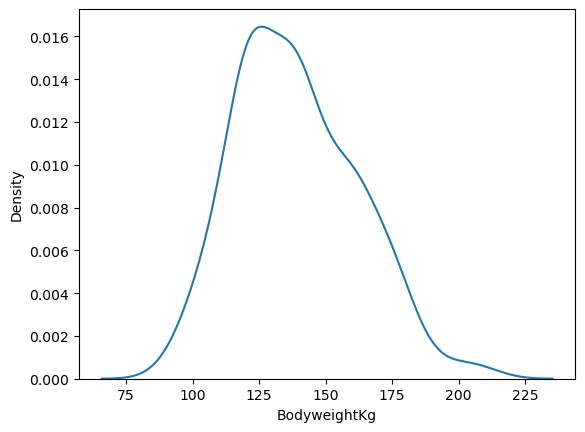

In [111]:
sns.kdeplot(df_no_dupes['BodyweightKg'])

<Axes: xlabel='TotalKg', ylabel='Tested'>

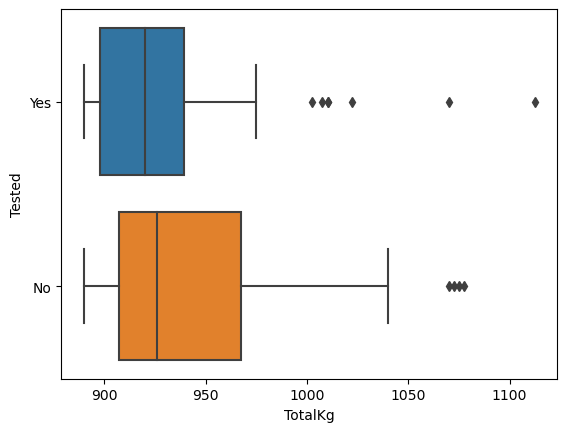

In [117]:
sns.boxplot(x=df_no_dupes['TotalKg'], y=df_no_dupes['Tested'])

In [106]:
df_out = df_no_dupes[['Sex', 'AgeClass', 'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 
                     'Best3DeadliftKg', 'TotalKg', 'Place', 'Tested', 'Country']]

In [107]:
df_out.head()

,Sex,AgeClass,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Tested,Country
567018,M,24-34,130+ kg,490.0,247.5,375.0,1112.5,1,Yes,USA
1035828,M,24-34,130+ kg,417.5,250.0,410.0,1077.5,1,No,NaN
1010210,M,24-34,130+ kg,417.5,247.5,410.0,1075.0,1,No,USA
628405,M,24-34,130+ kg,350.0,320.0,402.5,1072.5,1,No,Russia
132537,M,35-39,130+ kg,470.0,270.0,330.0,1070.0,1,Yes,Nauru


In [108]:
df_out.to_csv('strongest_lifters.csv', index=False)